In [5]:
import pandas as pd

# Data ban mobil baru
ban_mobil = {
    'diameter': [15, 16, 17, 18, 19],  # Diameter dalam inci
    'harga': [100, 120, 140, 160, 180]  # Harga dalam ribuan
}

ban_mobil_df = pd.DataFrame(ban_mobil)
ban_mobil_df


,diameter,harga
0,15,100
1,16,120
2,17,140
3,18,160
4,19,180


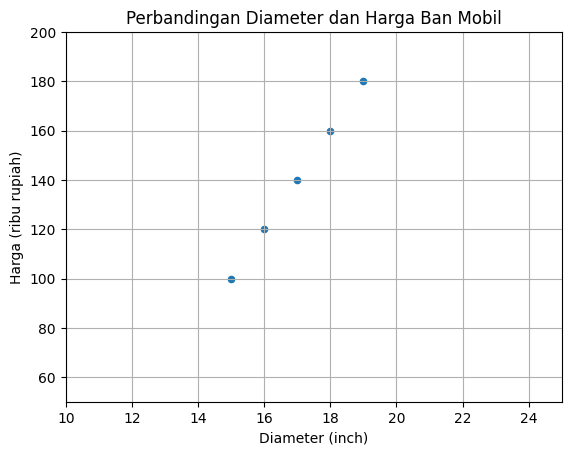

In [6]:
import matplotlib.pyplot as plt

ban_mobil_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga Ban Mobil')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (ribu rupiah)')
plt.xlim(10, 25)
plt.ylim(50, 200)
plt.grid(True)
plt.show()

In [8]:
import numpy as np

# Mengonversi data ban mobil menjadi array numpy
X = np.array(ban_mobil_df['diameter'])
y = np.array(ban_mobil_df['harga'])

print(f'X: {X}')
print(f'y: {y}')

X: [15 16 17 18 19]
y: [100 120 140 160 180]


In [11]:
X = X.reshape(-1, 1) 
X.shape

(5, 1)

In [9]:
X

array([15, 16, 17, 18, 19], dtype=int64)

In [13]:
from sklearn.linear_model import LinearRegression

# Membuat instance dari model LinearRegression
model = LinearRegression()

# Melatih model dengan data yang ada
model.fit(X, y)


LinearRegression()

In [16]:
X_vis = np.array ([0, 25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

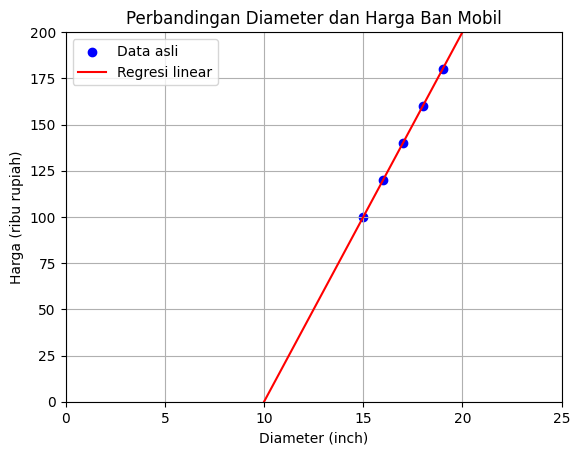

In [18]:
plt.scatter(X, y, color='blue', label='Data asli')
plt.plot(X_vis, y_vis, '-r', label='Regresi linear')
plt.title('Perbandingan Diameter dan Harga Ban Mobil')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (ribu rupiah)')
plt.xlim(0, 25)
plt.ylim(0, 200)
plt.legend()
plt.grid(True)
plt.show()

In [24]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: -199.99999999999994
slope: [20.]


In [25]:
print(f'X:\n{X}\n')
print(f'X flatten: {X.flatten()}\n')
print(f'y: {y}')

X:
[[15]
 [16]
 [17]
 [18]
 [19]]

X flatten: [15 16 17 18 19]

y: [100 120 140 160 180]


In [26]:
variance_x = np.var(X.flatten(), ddof=1)

print(f'variance: {variance_x}')

variance: 2.5


In [28]:
np.cov(X.flatten(), y)

array([[   2.5,   50. ],
       [  50. , 1000. ]])

In [29]:
covariance_xy = np.cov (X.flatten(), y) [0] [1]

print (f'covariance: {covariance_xy}')

covariance: 50.0


In [31]:
slope = covariance_xy / variance_x

print(f'slope: {slope}')

slope: 20.0


In [32]:
intercept = np.mean(y) - slope * np.mean(X)

print(f'intercept: {intercept}')

intercept: -200.0


In [34]:
diameter_ban_mobil = np.array([15, 16, 17, 18, 19]).reshape(-1, 1)
diameter_ban_mobil



array([[15],
       [16],
       [17],
       [18],
       [19]])

In [36]:
prediksi_harga = model.predict(diameter_ban_mobil)
prediksi_harga

array([100., 120., 140., 160., 180.])

In [37]:
for dmtr, hrg in zip(ban_mobil['diameter'], prediksi_harga): 
    print(f'Diameter: {dmtr}, Prediksi Harga: {hrg}')


Diameter: 15, Prediksi Harga: 100.0
Diameter: 16, Prediksi Harga: 120.0
Diameter: 17, Prediksi Harga: 140.0
Diameter: 18, Prediksi Harga: 160.0
Diameter: 19, Prediksi Harga: 180.0


In [38]:
X_train = np.array(ban_mobil['diameter']).reshape(-1, 1)
y_train = np.array(ban_mobil['harga'])

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)  
y_test = np.array([11, 8.5, 15, 18, 11])  


In [40]:
model = LinearRegression() 
model.fit(X_train, y_train)

LinearRegression()

In [41]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: -257.5079225352112


In [44]:
ss_res = sum((y_i - model.predict(x_i.reshape(-1, 1))[0])**2 
             for x_i, y_i in zip(X_test, y_test))
print(f'ss_res: {ss_res}')


ss_res: 14683.249999999996


In [46]:
mean_y = np.mean(y_test)
ss_tot = sum((y_i - mean_y)**2 for y_i in y_test)
print(f'ss_tot: {ss_tot}')


ss_tot: 56.8


In [47]:
r_squared = 1 - (ss_res/ss_tot)
print(f'R-squared: {r_squared}')

R-squared: -257.5079225352112
